In [124]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

In [125]:
# define number of qubits and classical bits
n_qubits = 8
n_bits = 1

In [126]:
# define the QuantumRegister and the QuantumCircuit
qr = QuantumRegister(8, 'q')
qc = QuantumCircuit(qr)

In [127]:
# define inputs
A = 5
B = 6
C = 6
D = 5

In [128]:
# apply X-gate to qubits corresponding to values A, B, C, D
for i in range(A):
    qc.x(qr[0])
for i in range(B):
    qc.x(qr[1])
for i in range(C):
    qc.x(qr[2])
for i in range(D):
    qc.x(qr[3])
    
qc.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐     
q_0: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├─────
     ├───┤├───┤├───┤├───┤├───┤┌───┐
q_1: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├
     ├───┤├───┤├───┤├───┤├───┤├───┤
q_2: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├
     ├───┤├───┤├───┤├───┤├───┤└───┘
q_3: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├─────
     └───┘└───┘└───┘└───┘└───┘     
q_4: ──────────────────────────────
                                   
q_5: ──────────────────────────────
                                   
q_6: ──────────────────────────────
                                   
q_7: ──────────────────────────────

In [129]:
# apply the rest of the circuit
qc.cx(qr[0], qr[4])
qc.cx(qr[1], qr[4])
qc.cx(qr[2], qr[5])
qc.cx(qr[3], qr[5])
qc.ccx(qr[0], qr[1], qr[6])
qc.ccx(qr[2], qr[3], qr[7])
qc.cx(qr[6], qr[5])
qc.cx(qr[7], qr[4])
qc.measure_all()
qc.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐                                             »
   q_0: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├───────■───────────────────■─────────────────»
        ├───┤├───┤├───┤├───┤├───┤┌───┐  │                   │                 »
   q_1: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├──┼────■──────────────■─────────────────»
        ├───┤├───┤├───┤├───┤├───┤├───┤  │    │              │                 »
   q_2: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├──┼────┼────■─────────┼────■────────────»
        ├───┤├───┤├───┤├───┤├───┤└───┘  │    │    │         │    │            »
   q_3: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├───────┼────┼────┼────■────┼────■────────────»
        └───┘└───┘└───┘└───┘└───┘     ┌─┴─┐┌─┴─┐  │    │    │    │       ┌───┐»
   q_4: ──────────────────────────────┤ X ├┤ X ├──┼────┼────┼────┼───────┤ X ├»
                                      └───┘└───┘┌─┴─┐┌─┴─┐  │    │  ┌───┐└─┬─┘»
   q_5: ────────────────────────────────────────┤ X ├┤ X ├──┼────┼──┤ X ├──┼──»
                                                └───┘└───┘┌─┴─┐  │  └─┬─┘  │  »
   q_6: ──────────────────────────────────────────────────┤ X ├──┼────■────┼──»
                                                          └───┘┌─┴─┐       │  »
   q_7: ───────────────────────────────────────────────────────┤ X ├───────■──»
                                                               └───┘          »
meas_0: ══════════════════════════════════════════════════════════════════════»
                                                                              »
meas_1: ══════════════════════════════════════════════════════════════════════»
                                                                              »
meas_2: ══════════════════════════════════════════════════════════════════════»
                                                                              »
meas_3: ══════════════════════════════════════════════════════════════════════»
                                                                              »
meas_4: ══════════════════════════════════════════════════════════════════════»
                                                                              »
meas_5: ══════════════════════════════════════════════════════════════════════»
                                                                              »
meas_6: ══════════════════════════════════════════════════════════════════════»
                                                                              »
meas_7: ══════════════════════════════════════════════════════════════════════»
                                                                              »
«         ░ ┌─┐                     
«   q_0: ─░─┤M├─────────────────────
«         ░ └╥┘┌─┐                  
«   q_1: ─░──╫─┤M├──────────────────
«         ░  ║ └╥┘┌─┐               
«   q_2: ─░──╫──╫─┤M├───────────────
«         ░  ║  ║ └╥┘┌─┐            
«   q_3: ─░──╫──╫──╫─┤M├────────────
«         ░  ║  ║  ║ └╥┘┌─┐         
«   q_4: ─░──╫──╫──╫──╫─┤M├─────────
«         ░  ║  ║  ║  ║ └╥┘┌─┐      
«   q_5: ─░──╫──╫──╫──╫──╫─┤M├──────
«         ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
«   q_6: ─░──╫──╫──╫──╫──╫──╫─┤M├───
«         ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
«   q_7: ─░──╫──╫──╫──╫──╫──╫──╫─┤M├
«         ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
«meas_0: ════╩══╬══╬══╬══╬══╬══╬══╬═
«               ║  ║  ║  ║  ║  ║  ║ 
«meas_1: ═══════╩══╬══╬══╬══╬══╬══╬═
«                  ║  ║  ║  ║  ║  ║ 
«meas_2: ══════════╩══╬══╬══╬══╬══╬═
«                     ║  ║  ║  ║  ║ 
«meas_3: ═════════════╩══╬══╬══╬══╬═
«                        ║  ║  ║  ║ 
«meas_4: ════════════════╩══╬══╬══╬═
«                           ║  ║  ║ 
«meas_5: ═══════════════════╩══╬══╬═
«                              ║  ║ 
«meas_6: ══════════════════════╩══╬═
«                                 ║ 
«meas_7: ═════════════════════════╩═
«

In [130]:
# run the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1)
result = job.result()

There is a rectangle with sides 5 6 6 5


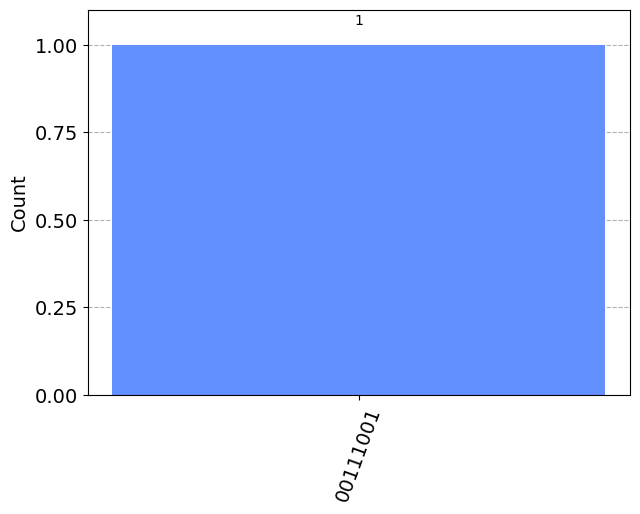

In [131]:
# print the measurement outcome
counts = result.get_counts(qc)
if list(counts.keys())[0][-n_bits] == '1':
    print("There is a rectangle with sides", A, B, C, D)
else:
    print("There is no rectangle with sides", A, B, C, D)
    
plot_histogram(counts)